# WASTE HEAT RECOVERY

This Module is an example of waste energy recovery

The system includes :
    - An electro-intensive industry
    - A dissipation load
    - A thermal storage system
    - A heat pump
    - A district heat network load
    - A district heat network production unit


## Objective: 
The objective consists in maximizing the recovered waste energy
![title](wasteHeatRecovery.PNG)

 An electro-intensive industrial process consumes electricity and rejects
    heat. This waste energy is whether recovered or dissipated depending on
    the waste recovery system sizing. A storage system and a heat pump are
    used in order to recover the waste energy, which is then injected on a
    district heat network to provide heat to a district heat load. The
    missing heat will be provided by a district heat network production unit.

## Operating steps:

1 - Creating an empty model
<br> 2 - Creating the unit dedicated to time management
<br> 3 - Importing time-dependent data from files
<br> 4 - Creating the electro-intensive industry unit
<br> 5 - Creating unit for heat dissipation from the industrial process
<br> 6 - Creating the thermal storage
<br> 7 - Creating the heat pump
<br> 8 - Creating the district heat load
<br> 9 - Creating the heat production plants
<br> 10 - Creating the heat node for the energy flows
<br> 11 - Connecting units to the nodes
<br> 12 - Minimizing the part of the heat load covered by the heat production plant
<br> 13 - Adding all nodes (and connected units) to the optimization model
<br> 14 - Writing into lp file
<br> 15 - Running optimization and update values


### Input Parameters:

1 - Electricity-to-Heat conversion (0 to 1)
    
    How much electricity consumption is converted to heat consumption

#### Thermal storage parameters
2 - The maximal charging and discharging powers

    The maximum  of ?? the storage is capable of transfer it. Défault: 5 MW = 5000.

3 -  The minimum charging and discharging powers
    
    The minimum  of ?? the storage is capable of transfer. When charging/discharging, the power should at least be 20% of the maximal charging/discharging powers

4 - Storage capacity 
    
    The maximum of power possible to store. Défault: 20MWh = 20000.

5 - Initial state of charge (0 to 1)

    How much power the store had before start the optimisation. Défault: 25% = 0.25

#### Heat pump parameters
6 - The coefficient of performance

7 - The heat pump has a electrical power limit

In [94]:

from StudyCases import waste,waste_results
from ipywidgets import widgets
from Dashboard import on_button_clicked



In [95]:
button = widgets.Button(description = "Click MeE")
interact = widgets.interactive
#display(button)
#button.on_click(on_button_clicked)
global ELEC_TO_HEAT_RATIO

def f(x):
    ELEC_TO_HEAT_RATIO = x.output
    print(x)
    
    
teste = interact(f, x=widgets.IntSlider(min=0,max=100,step=1,value=25));
display(teste)
ELEC_TO_HEAT_RATIO




interactive(children=(IntSlider(value=25, description='x'), Output()), _dom_classes=('widget-interact',))

0.9

In [100]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)

]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form




Box(children=(Box(children=(Label(value='Age of the captain'), IntSlider(value=40, max=60, min=40)), layout=La…

In [103]:
print(form.children[2].children[1].value)

15.0


 This statzement means lazaezaj 
 If you change ..... it results ...

In [88]:
    # --- Electricity-to-Heat conversion ---
    # 90% of the electrical consumption is converted into heat

print(ELEC_TO_HEAT_RATIO1)
ELEC_TO_HEAT_RATIO = 0.9

<function f at 0x000001A9756AF268>


 This statzement means lazaezaj 
 If you change ..... it results ...

In [89]:
    # --- Thermal storage parameters ---
    # The maximal charging and discharging powers both equal 5 MW
PC_MAX_STORAGE = PD_MAX_STORAGE = 5000

    # When charging/discharging, the power should at least be 20% of the
    # maximal charging/discharging powers
PC_MIN_STORAGE = PD_MIN_STORAGE = 0.15 * PC_MAX_STORAGE

 This statzement means lazaezaj 
 If you change ..... it results ...

In [91]:
CAPA_STORAGE = 20000    # Storage capacity of 20MWh
SOC_0_STORAGE = 0.2    # Initial state of charge of 25%

 This statzement means lazaezaj 
 If you change ..... it results ...

In [92]:
    # --- Heat pump parameters ---
COP = 3            # The coefficient of performance equals 3
P_MAX_HP = 1000    # The heat pump has a electrical power limit of 1 MW


You are studying the period from 2018-01-01 00:00:00 to 2018-01-07 23:00:00
Creating the indus_heat_prod.
Creating the indus_heat_cons.
Creating the indus_elec_cons.
Creating the indus.
Creating the dissipation.
Creating the thermal_storage.
Creating the heat_pump_heat_prod.
Creating the heat_pump_heat_cons.
Creating the heat_pump_elec_cons.
Creating the heat_pump.
Creating the district_heat_load.
Creating the heat_production.
Creating the heat_node_bef_valve.
Creating the heat_node_aft_valve.
Creating the heat_node_aft_hp.

--- Adding all variables to the model ---
Adding variable : heat_node_bef_valve_energy_export_to_heat_node_aft_valve
Adding variable : heat_node_bef_valve_is_exporting_to_heat_node_aft_valve
Adding variable : indus_heat_prod_p
Adding variable : indus_heat_prod_e_tot
Adding variable : indus_heat_prod_u
Adding variable : dissipation_p
Adding variable : dissipation_e_tot
Adding variable : dissipation_u
Adding variable : indus_heat_cons_p
Adding variable : indus_heat_c

C:\ENIGMa\omegalpes\general\optimisation\model.py:324: UserWarning: The unit indus seems to have as parent indus_heat_prod which was not declared as parent.
  parent_name))
C:\ENIGMa\omegalpes\general\optimisation\model.py:324: UserWarning: The unit indus seems to have as parent indus_heat_cons which was not declared as parent.
  parent_name))
C:\ENIGMa\omegalpes\general\optimisation\model.py:324: UserWarning: The unit indus seems to have as parent indus_elec_cons which was not declared as parent.
  parent_name))
C:\ENIGMa\omegalpes\general\optimisation\model.py:324: UserWarning: The unit heat_pump seems to have as parent heat_pump_heat_prod which was not declared as parent.
  parent_name))
C:\ENIGMa\omegalpes\general\optimisation\model.py:324: UserWarning: The unit heat_pump seems to have as parent heat_pump_heat_cons which was not declared as parent.
  parent_name))
C:\ENIGMa\omegalpes\general\optimisation\model.py:324: UserWarning: The unit heat_pump seems to have as parent heat_pum

Adding constraint : heat_production_on_off_max , exp = heat_production_p[t] <= heat_production_u[t] * 100000.0 for t in time.I
Adding constraint : heat_production_on_off_min , exp = heat_production_p[t] >= heat_production_u[t] * 1e-05 for t in time.I
Adding constraint : heat_production_calc_e_tot , exp = heat_production_e_tot == time.DT * lpSum(heat_production_p[t] for t in time.I)
Adding constraint : district_heat_load_on_off_max , exp = district_heat_load_p[t] <= district_heat_load_u[t] * 100000.0 for t in time.I
Adding constraint : district_heat_load_on_off_min , exp = district_heat_load_p[t] >= district_heat_load_u[t] * 1e-05 for t in time.I
Adding constraint : district_heat_load_calc_e_tot , exp = district_heat_load_e_tot == time.DT * lpSum(district_heat_load_p[t] for t in time.I)

 - - - - - RUN OPTIMIZATION - - - - - 

 - - - - - UPDATE RESULTS - - - - - 
Updating unit : heat_node_bef_valve
	Quantity : energy_export_to_heat_node_aft_valve
	Quantity : is_exporting_to_heat_node_af

<IPython.core.display.Javascript object>


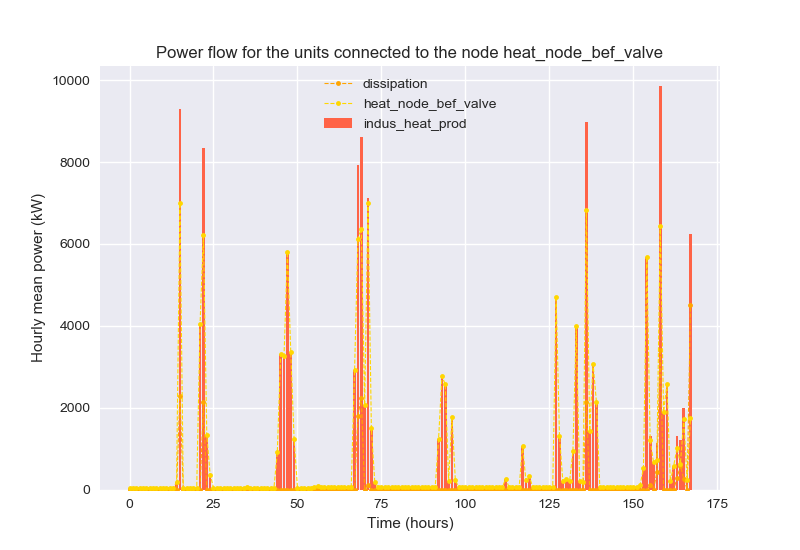


Preparing to plot the energetic flows through the node heat_node_bef_valve.
	Add power from indus_heat_prod.
	Add power from dissipation.
	Add power from heat_node_bef_valve.


<IPython.core.display.Javascript object>


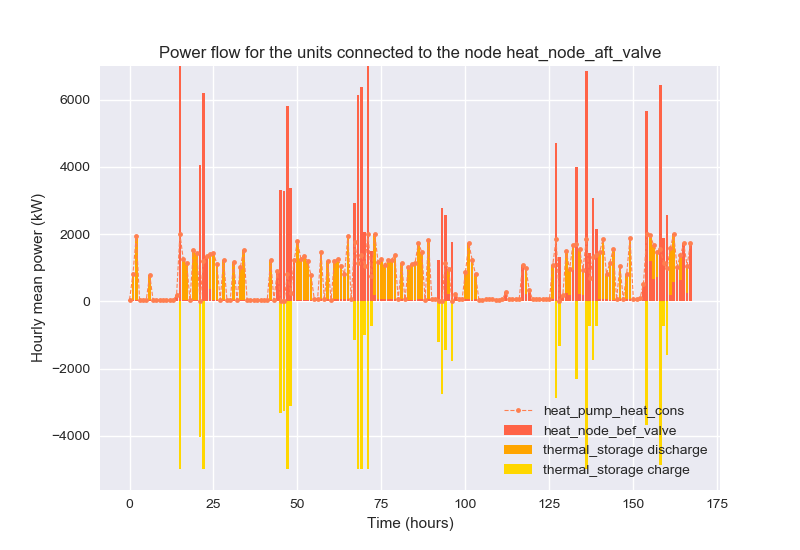


Preparing to plot the energetic flows through the node heat_node_aft_valve.
	Add power from heat_node_bef_valve.
	Add power from thermal_storage.
	Add power from heat_pump_heat_cons.


<IPython.core.display.Javascript object>


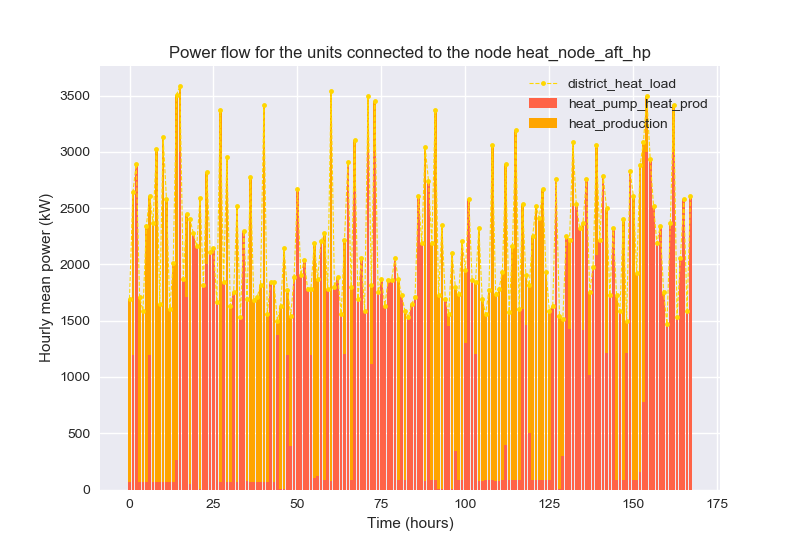


Preparing to plot the energetic flows through the node heat_node_aft_hp.
	Add power from heat_pump_heat_prod.
	Add power from heat_production.
	Add power from district_heat_load.


In [93]:
    # *** RUN MAIN ***
waste(elec2heat_ratio=ELEC_TO_HEAT_RATIO, pc_max=PC_MAX_STORAGE,
         pd_max=PD_MAX_STORAGE, pc_min=PC_MIN_STORAGE,
         pd_min=PD_MIN_STORAGE, e_max=CAPA_STORAGE, cop_hp=COP,
         pmax_elec_hp=P_MAX_HP, storage_soc_0=SOC_0_STORAGE)

    # *** SHOW THE RESULTS ***
waste_results()

Expliquer le resultat

In [8]:
button = widgets.Button(description = "Click MeE")
interact = widgets.interact
display(button)

def on_button_clicked(b):
    print("Button clicked")
button.on_click(on_button_clicked)

def f(x):
    waste(elec2heat_ratio=x, pc_max=PC_MAX_STORAGE,
         pd_max=PD_MAX_STORAGE, pc_min=PC_MIN_STORAGE,
         pd_min=PD_MIN_STORAGE, e_max=CAPA_STORAGE, cop_hp=COP,
         pmax_elec_hp=P_MAX_HP, storage_soc_0=SOC_0_STORAGE)
    waste_results()
    print(x)
    
interact(f,x=2)


Button(description='Click MeE', style=ButtonStyle())

interactive(children=(IntSlider(value=2, description='x', max=6, min=-2), Output()), _dom_classes=('widget-int…

<function __main__.f(x)>